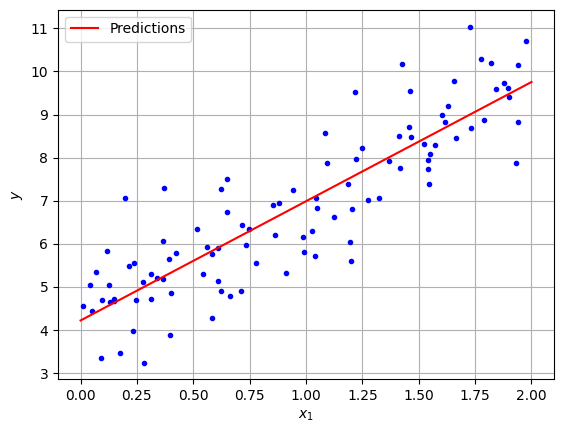

In [1]:
#  **선형 회귀(Linear Regression)**를
#  **정규 방정식(Normal Equation)**을 사용하여 구현하고, 결과를 시각화하는 Python 스크립트
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(42) #난수 생성기의 초기값
m = 100 #샘플 데이터의 개수를 설정

X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1) # np.random.randn -> 평균이 0이고 표준편차가 1인 정규 분포(가우시안 분포)를 따르는 난수를 생성(인자로는 원하는 배열의 크기를 지정)

# **정규 방정식을 사용한 파라미터 계산**
# np.c_[...] : 열 방향으로 배열을 연결
# np.ones((m, 1)) : m×1 크기의 행렬로, 모든 값이 1인 벡터를 생성
# 기존의 X는 m x 1 행렬로 이루어진 데이터 -> 이 행렬에 x0(첫번째 열)=1 추가. X_b는 m x 2 행렬
X_b = np.c_[np.ones((m, 1)), X]  # X에 x0 = 1 추가

# 정규 방정식 계산
# X_b.T는 X_b의 전치 행렬 2 x m
# X_b.T @ X_b : 2×m 행렬과 m×2 행렬의 곱으로 2×2 크기의 행렬을 생성 -> 선형 독립성 확인과 파라미터 간 상호작용 계산에 필요
# np.linalg.inv(X_b.T @ X_b): 정규 방정식의 해를 구하기 위한 핵심 부분으로, 데이터가 선형적으로 독립적이라면 역행렬이 존재(역행렬을 구하는 이유는 선형 방정식을 풀기 위해)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
# 결과로 얻어지는 파라미터는 2×1 크기의 행렬 -> [절편
#                                                 기울기]

# 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b @ theta_best

# 결과 시각화
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

In [2]:
# 경사 하강법으로 선형 회귀 모델의 최적의 매개변수를 학습

eta = 0.1  # 학습률 (각 단계에서 파라미터가 업데이트되는 크기를 결정)
n_epochs = 1000 # 경사 하강법의 반복 횟수
m = len(X_b) # 데이터 샘플의 개수
theta = np.random.randn(2, 1)  # 랜덤 초기화

# 각 반복(epoch)마다 손실 함수의 기울기(gradient)를 계산
for epoch in range(n_epochs):
    # gradients -> 파라미터를 어떻게 조정해야 손실이 줄어드는지 알려주는 벡터
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    # 파라미터를 기울기의 반대 방향으로 이동하여 손실 함수를 최소화 -> eta * gradients (학습률과 기울기를 곱한 값). 파라미터 조정 크기를 결정
    theta = theta - eta * gradients

print("학습된 파라미터:", theta)

학습된 파라미터: [[4.21509616]
 [2.77011339]]


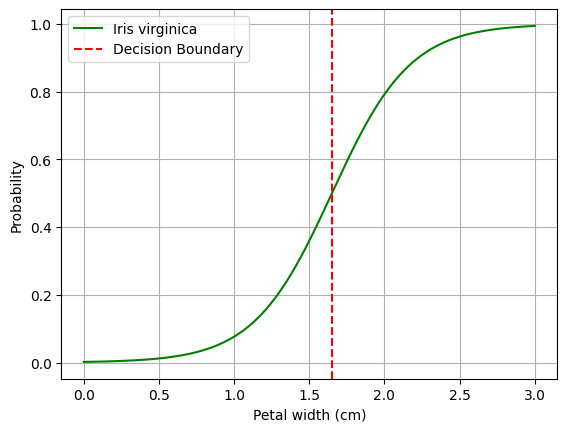

In [3]:
# **로지스틱 회귀(Logistic Regression)**를 사용하여
# Iris 데이터셋에서 Iris virginica 꽃인지 여부를 예측하고, 결정 경계(decision boundary)를 시각화

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 및 준비
iris = load_iris()
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica 여부

# 데이터 분할 및 모델 학습
# 학습 데이터: 모델을 학습하는 데 사용. / 테스트 데이터: 모델의 성능을 평가하는 데 사용.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # random_state=42 : 결과 재현성을 보장하기 위해 난수 생성의 초기값을 고정
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train) # 모델을 학습 데이터로 학습

# 결정 경계 시각화
# np.linspace(0, 3, 1000) : 꽃잎 너비가 0에서 3까지 균등한 1000개의 값을 생성. 이는 모델이 예측을 수행할 새로운 데이터
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # .reshape(-1, 1) -> m×1 형태로 변환

# log_reg.predict_proba(X_new) -> 각 X_new에 대한 클래스 0(아님)과 1(맞음)에 대한 확률을 예측
y_proba = log_reg.predict_proba(X_new) # 결과는 1000×2 크기의 배열로, 각 행의 첫 번째 열은 클래스 0의 확률, 두 번째 열은 클래스 1의 확률

# y_proba[:, 1] >= 0.5 : 클래스 1(Iris virginica)일 확률이 50% 이상인 X_new를 필터링.
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] # 첫 번째 값을 선택해 결정 경계(분류 기준이 바뀌는 지점)를 정의

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica") # X_new에 대해 예측된 클래스 1(Iris virginica)의 확률을 녹색 선으로 표시
plt.axvline(x=decision_boundary, color="r", linestyle="--", label="Decision Boundary") # 결정 경계는 Iris virginica로 분류되는 꽃잎 너비의 최소값
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend() # 범례를 추가
plt.grid()
plt.show()

특성 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
타깃 이름: ['setosa' 'versicolor' 'virginica']
데이터 크기: (150, 4)
훈련 세트 크기: (120, 1)
테스트 세트 크기: (30, 1)
모델 정확도 (Accuracy): 1.0


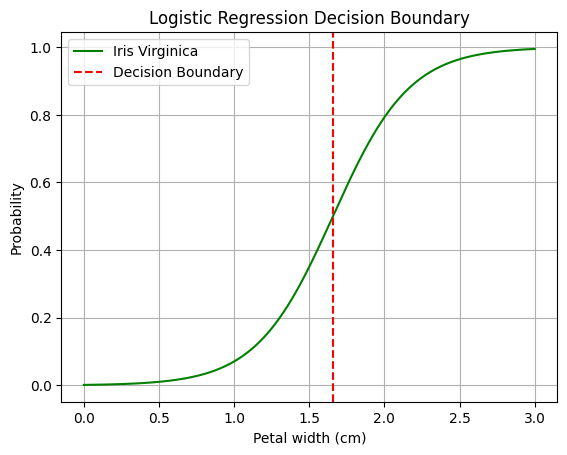

결정 경계 (Petal width): 1.6576576576576576


In [6]:
# **로지스틱 회귀(Logistic Regression)**를 사용하여 분류 문제를 해결합니다.
# Iris 데이터셋을 활용하여 Iris Virginica 품종을 분류하는 모델을 구현합니다.
from sklearn.datasets import load_iris
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

# 데이터 로드
iris = load_iris()

# 1. 데이터 준비
# sklearn.datasets.load_iris를 사용하여 데이터를 로드
# 데이터의 구조를 이해하기 위해 주요 정보를 출력
# Iris Virginica 품종 여부를 예측하기 위해 타깃 데이터를 이진화 -> target == 2를 1로, 나머지는 0으로 변환

print("특성 이름:", iris.feature_names)
print("타깃 이름:", iris.target_names)
print("데이터 크기:", iris.data.shape)

X = iris.data[:, 3:]  # 꽃잎 너비만 사용
y = (iris.target == 2).astype(int)  # Virginica는 1, 나머지는 0
# print("이진화된 타깃 데이터 예:", y[:10])

# 2. 데이터 분할
# 데이터를 **훈련 세트(80%)**와 **테스트 세트(20%)**로 분할한 후, 훈련 세트와 테스트 세트의 크기를 출력
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("훈련 세트 크기:", X_train.shape)
print("테스트 세트 크기:", X_test.shape)

# 3. 모델 학습 / 예측 및 평가
# 모델 정의 및 훈련 데이터를 사용하여 학습
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 테스트 데이터를 사용하여 예측 및 평가
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("모델 정확도 (Accuracy):", accuracy)

# 4. 결정 경계 시각화
# 꽃잎 너비(petal width) 값을 기반으로 결정 경계를 시각화
# (X)의 값을 0부터 3까지 1000개의 점으로 나눠 예측 확률을 계산
# Iris Virginica 확률 곡선 / 결정 경계(세로선)

# 결정 경계 계산
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # 꽃잎 너비 0~3 범위
y_proba = log_reg.predict_proba(X_new)  # 각 클래스 확률 계산
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]  # 결정 경계

# 그래프 시각화
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris Virginica")
plt.axvline(x=decision_boundary, color="r", linestyle="--", label="Decision Boundary")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid()
plt.show()

print("결정 경계 (Petal width):", decision_boundary[0])

모델의 정확도(Accuracy)는 1.0으로, 테스트 데이터에서 모든 샘플을 정확히 분류가 되었음을 확인
-> 이는 모델이 훈련된 데이터와 테스트 데이터에서 Iris Virginica 여부를 완벽히 학습했다는 것

결정 경계는 꽃잎 너비가 약 1.66cm에서 설정되었음을 확인
-> 꽃잎 너비가 1.6576cm 이상이면 Iris Virginica로 분류, 그렇지 않으면 다른 종으로 분류한다는 뜻

=> 확률 곡선 시각화에서 Iris Virginica의 확률은 결정 경계에서 약 50%로 교차하며, 이는 로지스틱 회귀의 정의에 부합하다고 할 수 있습니다.